In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def reduce_matrix(matrix, row, col):
    return np.delete(np.delete(matrix, row, axis=0), col, axis=1)

def check_square(matrix):
    return matrix.shape[0] == matrix.shape[1]

def determinant(matrix):
    if not check_square(matrix):
        print("This matrix is not square and thus does not have a determinant.")
        return None
    
    if matrix.shape[0] == 2:
        return matrix[0,0]*matrix[1,1] - matrix[0,1]*matrix[1,0]
    
    det = 0
    for x in range(matrix.shape[0]):
        reduced_matrix = reduce_matrix(matrix, 0, x)
        det += ((-1)**x)*matrix[0,x]*determinant(reduced_matrix)

    return det

def compute_rss(X, y, beta):
    # Compute RSS
    # print(f'X shape: {X.shape}')
    # print(f'y shape: {y.shape}')
    # print(f'beta: {beta}')
    rss = np.sum((y - np.dot(X, beta))**2)
    return rss

def gradient_descent(X, y, alpha, max_iter, tolerance):
    # Initialize beta as a zero vector of dimension: 1xn, where n = number of features in X. 

    n_features = X.shape[1]
    #print(f'n_features: {n_features}')

    beta = np.zeros(n_features)
    #print(f'beta: {beta}')
    
    # Make a list to hold RSS for convergence check
    rss_list = [0]
    #print(rss_list)

    for iteration in range(max_iter):

        # Compute the current RSS
        current_rss = compute_rss(X, y, beta)
        # print(current_rss)

        # Add current RSS to RSS list.
        rss_list.append(current_rss)
        # print(rss_list)

        # Calculate the gradient
        predictions = np.dot(X, beta)
        residuals = y - predictions
        gradient = -2 * np.dot(X.T, residuals)
        
        # Update beta
        beta = beta - alpha * gradient

        # Check for convergence
        if abs(rss_list[-2] - current_rss) < tolerance:
            print(f"Converged after {iteration + 1} iterations.")
            break
    
    return rss_list


In [86]:
# Load the data
X = pd.read_csv("PS1/data/X.csv",index_col=0).values
y = pd.read_csv("PS1/data/y.csv",index_col=0).values.flatten()

# print(f'X: {X}')
# print(f'y: {y}')


Gradient descent RSS results after 5000 iterations:
learning rate 1e-05, min. RSS: 15.042454262099602
learning rate 0.0001, min. RSS: 4.491995925664074
learning rate 0.001, min. RSS: 4.048558984287208
learning rate 0.01, min. RSS: 3.8953098719208596


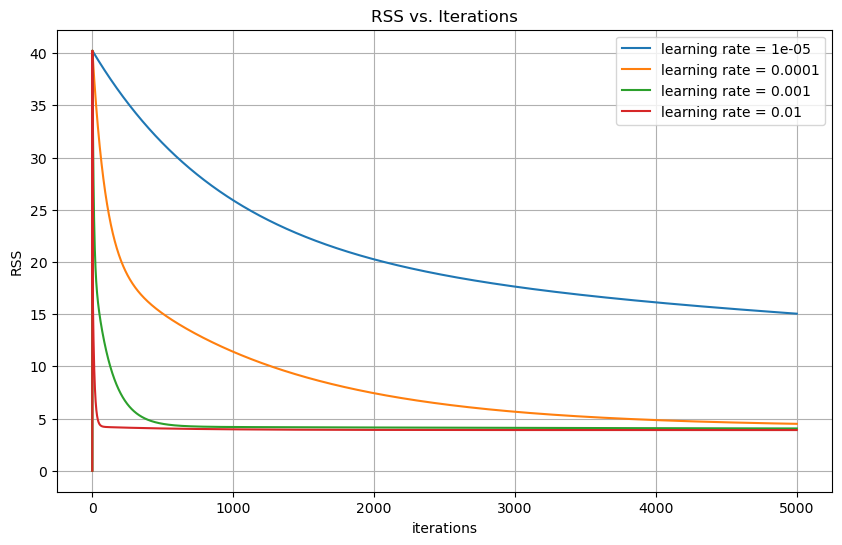

In [87]:
learning_rates = [1e-5, 1e-4, 1e-3, 1e-2]
max_iterations = 5000

rss_list_dict = {}

for n in learning_rates:
    rss_list = gradient_descent(X, y, alpha = n, max_iter = max_iterations, tolerance=0)
    rss_list_dict[n] = rss_list

print(f'Gradient descent RSS results after {max_iterations} iterations:')
plt.figure(figsize=(10,6))
for alpha, rss_list in rss_list_dict.items():
    plt.plot(range(max_iterations+1),rss_list,label=f'learning rate = {alpha}')
    print(f'learning rate {alpha}, min. RSS: {min(rss_list[1:])}')

plt.xlabel('iterations')
plt.ylabel('RSS')
plt.title('RSS vs. Iterations')
plt.legend()
plt.grid()
plt.show()


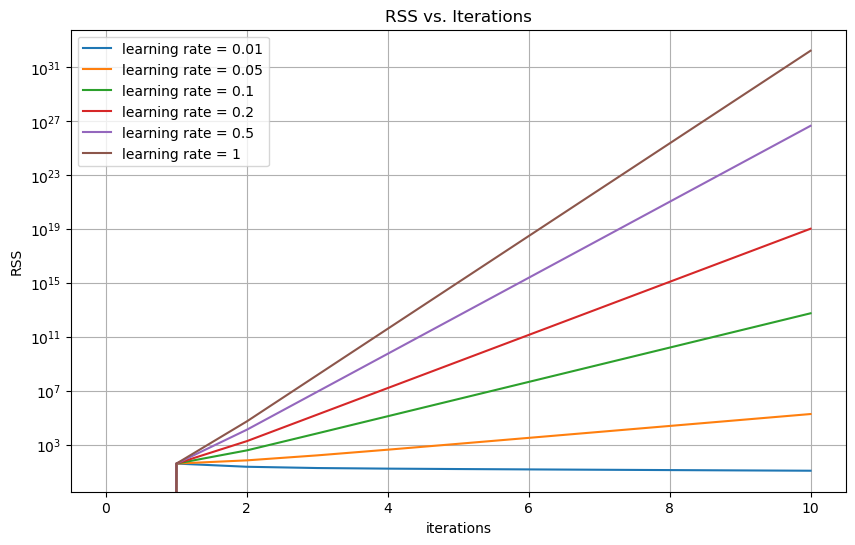

In [88]:
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5, 1]
max_iterations = 10

rss_list_dict = {}

for n in learning_rates:
    rss_list = gradient_descent(X, y, alpha = n, max_iter = max_iterations, tolerance=0)
    rss_list_dict[n] = rss_list

plt.figure(figsize=(10,6))
for alpha, rss_list in rss_list_dict.items():
    plt.plot(range(max_iterations+1),rss_list,label=f'learning rate = {alpha}')

plt.xlabel('iterations')
plt.ylabel('RSS')
plt.yscale('log')
plt.title('RSS vs. Iterations')
plt.legend()
plt.grid()
plt.show()

In [89]:
matrix = np.dot(X.T, X)
det_XtX = determinant(matrix)
print(f'The determinant of (X.T)(X) is: {det_XtX}')
if det_XtX != 0:
    print("It is non-singular.")
else: 
    print('It is singular.')
    
if det_XtX != 0:
    beta_closed = np.linalg.inv(matrix).dot(X.T).dot(y)

print(f'The beta closed form solution is: {beta_closed}')

The determinant of (X.T)(X) is: 2.101846449931003
It is non-singular.
The beta closed form solution is: [ 2.52261018 -3.27003073  0.47430873]


In [90]:

rss = compute_rss(X,y,beta_closed)
print(f'RSS from the closed form solution: {rss}')

RSS from the closed form solution: 3.8951779787143193
